# AMM szorgalmi házi
* Készítette: Szabó Péter Arvid és Jacsev Sámuel

# Fájlok beolvasása

In [1]:
import pandas as pd
import numpy as np

In [2]:
# Adatok beolvasása
df1 = pd.read_csv('../data/features_scaled_pca200_1.csv')
df2 = pd.read_csv('../data/features_scaled_pca200_2.csv')
y_df = pd.read_csv('../data/y.csv')

# Két DataFrame egyesítése
df = pd.concat([df1, df2], axis=0).reset_index(drop=True)

# Címkék hozzáadása a DataFrame-hez
df['class'] = y_df

# Ellenőrizzük az adatok formátumát
df.shape

(53172, 201)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,191,192,193,194,195,196,197,198,199,class
0,17.484333,-53.346394,8.315883,12.842766,17.246450,-11.136981,-2.190900,-5.770115,32.924210,9.214850,...,-0.925323,0.291593,-0.860534,3.975912,3.325422,-1.803825,0.021522,2.283926,3.152647,1
1,9.752113,-31.421246,-3.709946,34.372124,14.922827,-3.439757,-4.124628,-5.202246,27.400799,9.419023,...,2.554391,-0.955958,-0.998349,0.320435,2.177476,0.733975,0.326334,-0.845918,0.431995,1
2,10.663464,-24.330734,-6.765925,24.682550,32.058144,-6.994260,0.042581,2.088462,12.306052,-5.328636,...,-1.797414,-0.854061,2.059719,0.520592,-1.544369,-1.872500,0.527784,3.153715,1.027877,1
3,19.297976,-45.193165,4.095250,3.655397,35.534405,-9.569592,0.104378,0.278010,18.565514,-3.908132,...,-0.853210,0.682993,1.821722,0.268970,-3.250957,-0.829722,0.653328,1.726028,2.186518,1
4,18.461073,-27.163027,-7.082843,40.980938,9.698304,-2.918755,-3.875480,-6.021370,26.187963,6.723205,...,-1.057513,-0.596888,-0.475806,-1.324441,3.168553,2.441467,-0.785635,-0.983824,0.996994,1


In [4]:
# osztályok és karakterek összepárosítása
numbers = [str(i) for i in range(10)]  # 0 to 9
uppercase_letters = [chr(i) for i in range(65, 91)]  # A to Z
lowercase_letters = [chr(i) for i in range(97, 123)]  # a to z

all_characters = numbers + uppercase_letters + lowercase_letters

# ellenőrzés a class-ok számára
len(df['class'].unique()) == len(all_characters)

True

In [5]:
# save to file
with open('../data/all_characters.txt', 'w') as f:
    for i, chr in enumerate(all_characters):
        f.write(f"{i+1}: {chr}\n")



# Adatalőkészítés

In [6]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [7]:
scaler = StandardScaler()

In [10]:
y = df['class']
#y_easy.reset_index(drop=True, inplace=True)
X = df.drop('class', axis=1)
#X_easy.reset_index(drop=True, inplace=True)

X = X.values
y = y.values

In [11]:
len(df['class'].unique())

62

In [12]:
# FULL

X_full = df.iloc[:, :-1]
X_scaled = scaler.fit_transform(X_full.astype(np.float32))

In [13]:
# EASY

X_easy_full = df.iloc[:, :-1]
X_easy_scaled = scaler.fit_transform(X_easy_full.astype(np.float32))

In [15]:
# PCA EASY - FULL
pca = PCA(n_components=200)
X = pca.fit_transform(X_easy_scaled)
#X = pca.fit_transform(X_scaled)

In [16]:
print(f"X shape: {X.shape}")
print(f"y shape: {y.shape}")

X shape: (53172, 200)
y shape: (53172,)


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Modellek építése és tesztelése

## Logisztikus Regresszió

In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns

In [15]:
# Logisztikus regresszió modell
model = LogisticRegression(max_iter=800)
model.fit(X_train, y_train)

/home/zeus/miniconda3/envs/cloudspace/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1200)

In [16]:
# Modell értékelése
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy: 0.8228657389996239
              precision    recall  f1-score   support

           1       0.75      0.84      0.79        85
           2       0.87      0.87      0.87       104
           3       0.93      0.98      0.95        81
           4       0.99      0.91      0.95        87
           5       0.95      0.94      0.94        63
           6       0.94      0.90      0.92        94
           7       0.91      0.92      0.91        74
           8       0.90      0.99      0.94        86
           9       0.93      0.92      0.92        86
          10       0.91      0.90      0.91        80
          11       0.86      0.89      0.88        75
          12       0.88      0.90      0.89        81
          13       0.76      0.75      0.76        93
          14       0.94      0.88      0.91        88
          15       0.93      0.94      0.93        68
          16       0.91      0.95      0.92        91
          17       0.90      0.90      0.90        7

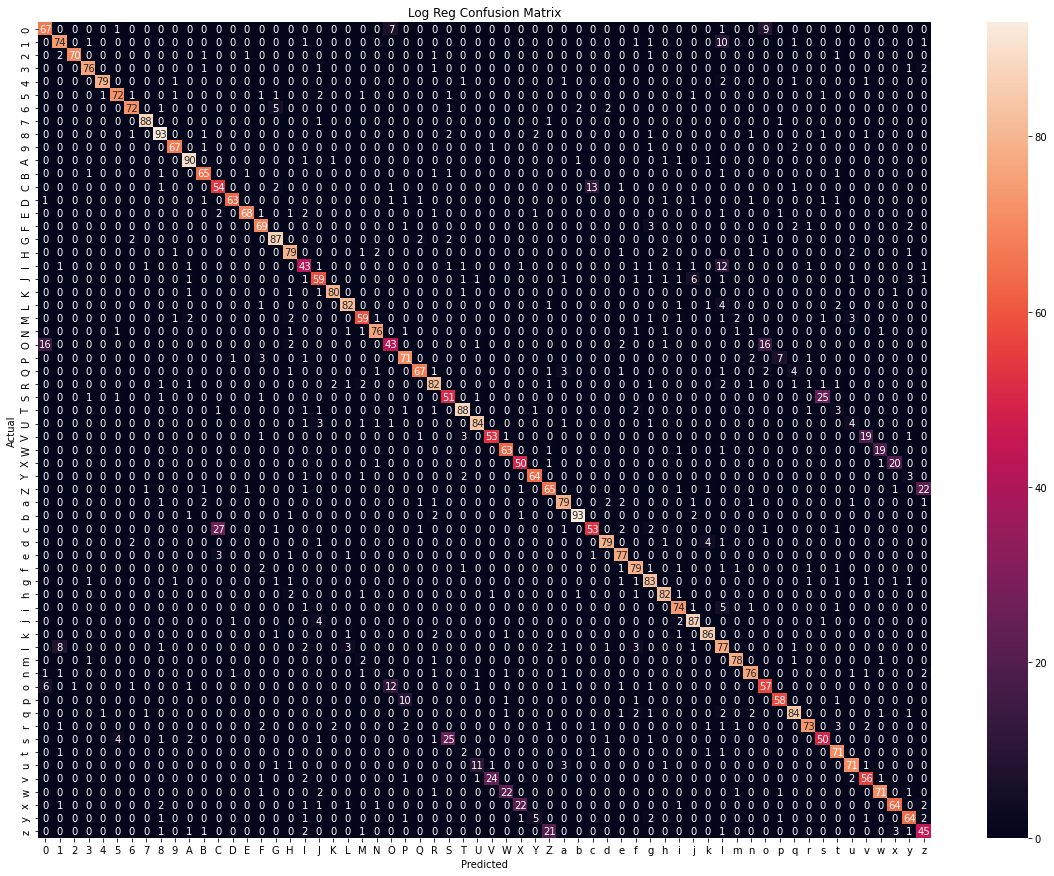

In [72]:
# confusion mátrix vizualizálása hőtérképpel

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,15))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=all_characters, yticklabels=all_characters)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Log Reg Confusion Matrix')
plt.show()

## KNN Modell

In [26]:
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt


In [19]:
# KNN keresztvalidációval
from sklearn.calibration import cross_val_predict


kf = KFold(n_splits=10, shuffle=True, random_state=42)
knn_model = KNeighborsClassifier(n_neighbors=1)
y_pred_knn = cross_val_predict(knn_model, pd.DataFrame(X), y, cv=kf)

In [22]:
# List to store accuracy for each fold
knn_accuracy_scores = []
y_fold_test = None
y_fold_pred = 0

for train_index, test_index in kf.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    # Fit the model
    knn_model.fit(X_train, y_train)
    
    # Make predictions
    y_fold_test = y_test
    y_fold_pred = knn_model.predict(X_test)
    
    # Calculate accuracy for this fold
    fold_accuracy = accuracy_score(y_test, y_fold_pred)
    knn_accuracy_scores.append(fold_accuracy)


In [23]:
# Modell evaluation
print("Minimum accuracy score: ", np.min(knn_accuracy_scores))
print("Maximum accuracy score: " ,np.max(knn_accuracy_scores))
print("Average Accuracy Score:", np.mean(knn_accuracy_scores))
print("Standard Deviation of Accuracy Scores:", np.std(knn_accuracy_scores))

# when using cross_val_predict
# print(classification_report(y, y_pred_knn))


Minimum accuracy score:  0.8830387363670553
Maximum accuracy score:  0.8956178296031597
Average Accuracy Score: 0.8903747111576589
Standard Deviation of Accuracy Scores: 0.0040753817562360645


In [31]:
import os
import cv2
# Step 1: Define the path to the TestData folder
test_data_path = '../data/TestData'

# Step 2: List all image files in the TestData folder
test_images = [f for f in os.listdir(test_data_path) if f.endswith('.png')]

# Step 3: Prepare the images for prediction
test_data = []

for file in test_images:
    # Read the image in grayscale
    img = cv2.imread(os.path.join(test_data_path, file), 0)
    
    # Resize the image to 128x128 if needed (not required if already the correct size)
    if img.shape != (128, 128):
        img = cv2.resize(img, (128, 128))
    
    # Normalize the pixel values
    img = img / 255.0
    
    # Add channel dimension (1 for grayscale)
    img = img.reshape(128, 128, 1)
    
    # Append to the test data list
    test_data.append(img)

# Convert the list to a numpy array
X_test_data = np.array(test_data)

In [32]:
X_test_data = X_test_data / 255.0

In [33]:
pca = PCA(n_components=200)
X_pca = pca.fit_transform(X_test_data)

ValueError: Found array with dim 4. PCA expected <= 2.

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X, y)
y = knn_model.predict(X_test_data)

In [24]:
print(classification_report(y, y_pred_knn))

              precision    recall  f1-score   support

           1       0.75      0.78      0.76       900
           2       0.90      0.86      0.88       900
           3       0.99      0.99      0.99       800
           4       0.96      0.95      0.96       800
           5       0.99      0.98      0.99       800
           6       0.98      0.96      0.97       900
           7       0.96      0.96      0.96       800
           8       0.98      0.98      0.98       900
           9       0.95      0.95      0.95       900
          10       0.98      0.98      0.98       800
          11       0.98      0.98      0.98       900
          12       0.92      0.93      0.93       800
          13       0.73      0.81      0.77       900
          14       0.95      0.95      0.95       800
          15       0.88      0.82      0.85       800
          16       0.85      0.89      0.87       800
          17       0.94      0.88      0.91       900
          18       0.92    

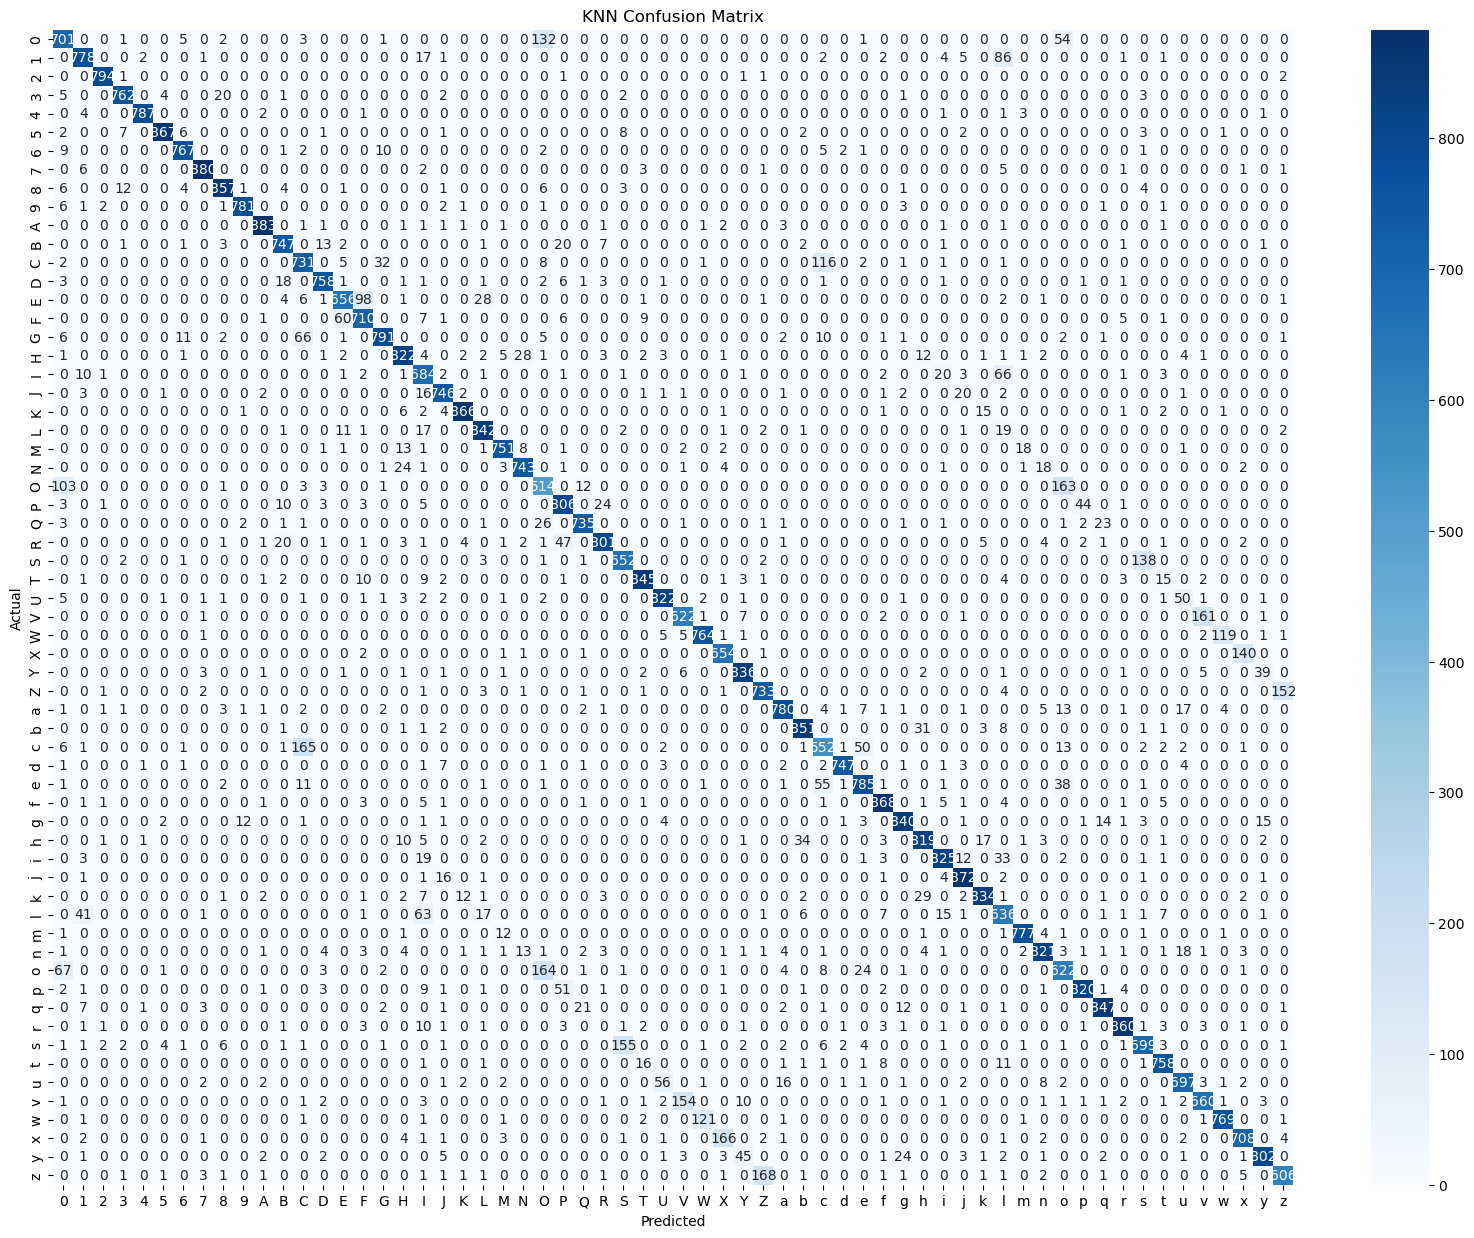

In [27]:
# confusion mátrix kiszámítása
cm_knn = confusion_matrix(y, y_pred_knn)

# Zavaró mátrix vizualizálása hőtérképpel
plt.figure(figsize=(20,15))
sns.heatmap(cm_knn, annot=True, fmt='d', cmap='Blues', xticklabels=all_characters, yticklabels=all_characters)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('KNN Confusion Matrix')
plt.show()

In [44]:
remaining_labels = []
for i in range(len(all_characters)):
    if all_characters[i] in remaining_characters:
        remaining_labels.append(i)

## SVM

In [51]:
all_characters[0]

'0'

In [52]:
#Import svm model
from sklearn import svm

In [33]:
svm_lin = svm.SVC(kernel='linear') # Linear Kernel

svm_lin.fit(X_train, y_train)

y_svm_lin_pred = clf.predict(X_test)

In [34]:
print("Accuracy:", accuracy_score(y_test, y_svm_lin_pred))
print(classification_report(y_test, y_svm_lin_pred))

Accuracy: 0.8661150808574652
              precision    recall  f1-score   support

           1       0.75      0.87      0.80        85
           2       0.94      0.86      0.90        90
           3       0.94      0.95      0.94        77
           4       1.00      0.96      0.98        82
           5       0.98      0.95      0.96        86
           6       0.92      0.94      0.93        83
           7       0.98      0.96      0.97        83
           8       0.98      0.98      0.98        91
           9       0.94      0.91      0.93       103
          10       0.96      0.90      0.93        72
          11       0.98      0.99      0.98        96
          12       0.94      0.94      0.94        72
          13       0.67      0.77      0.72        73
          14       0.96      0.93      0.94        73
          15       1.00      0.92      0.96        78
          16       0.95      0.88      0.91        78
          17       0.98      0.96      0.97        9

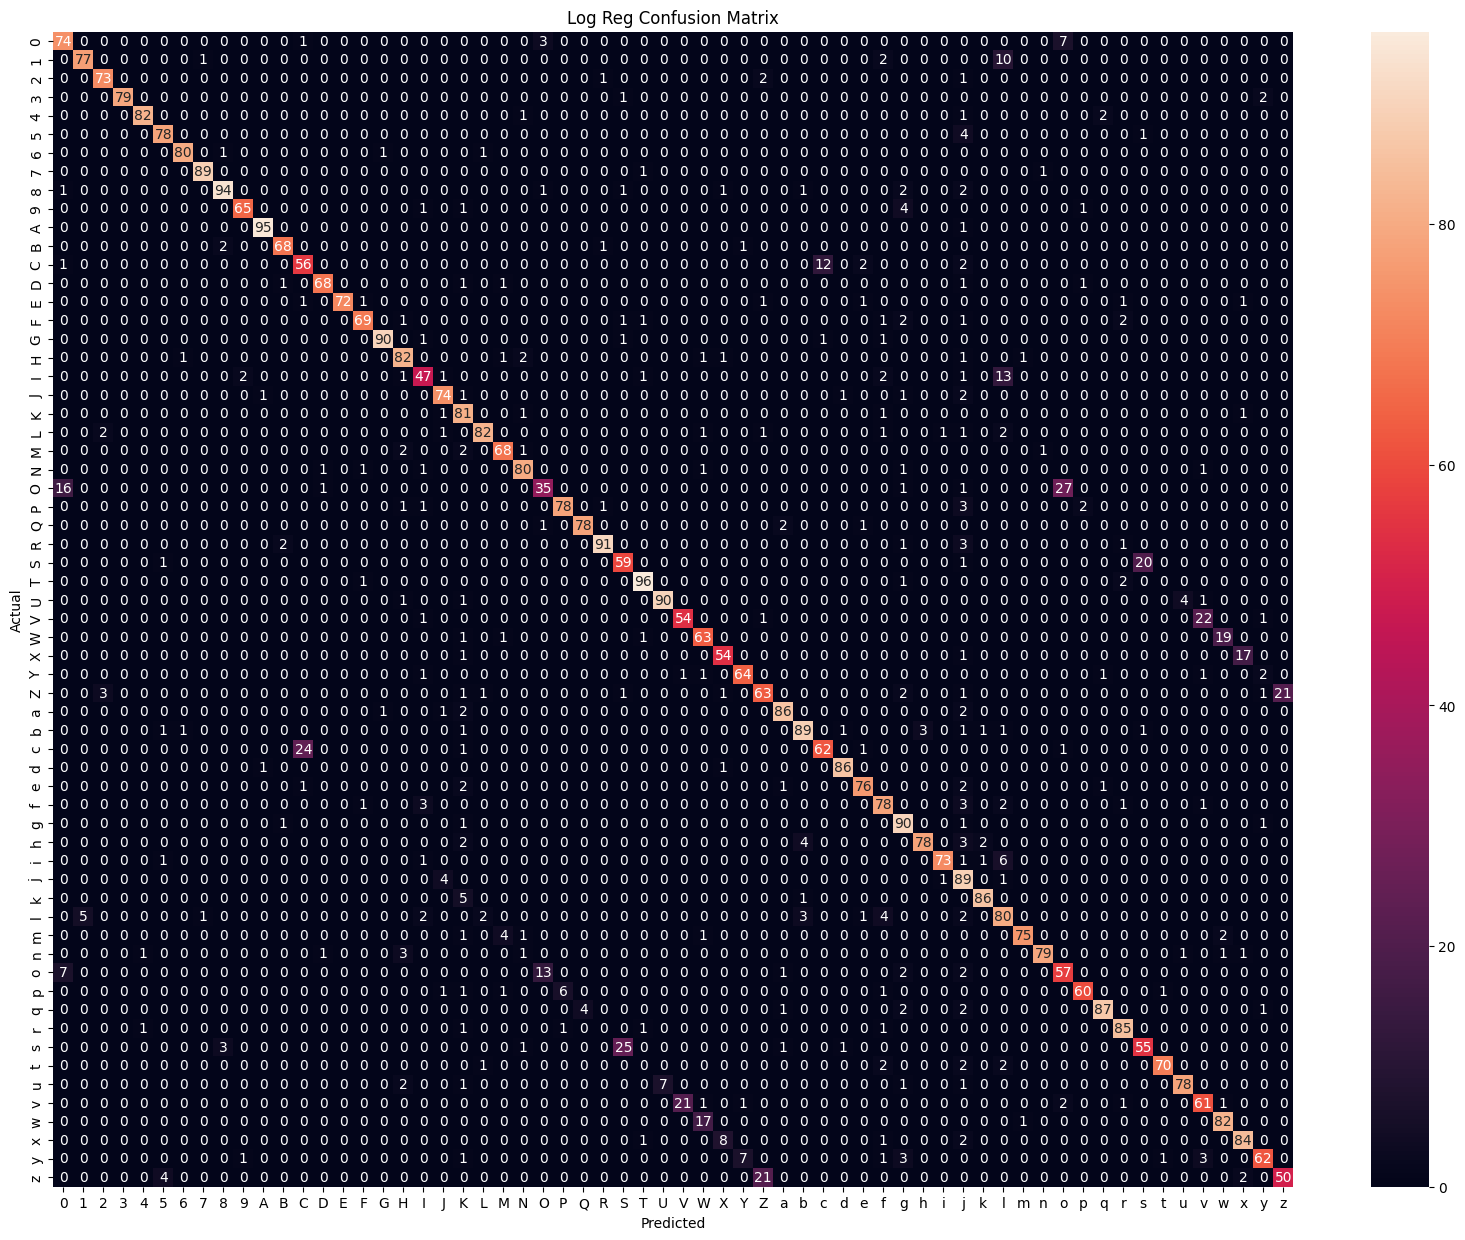

In [35]:
cm_svm_lin = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(20,15))
sns.heatmap(cm_svm_lin, annot=True, fmt='d', xticklabels=all_characters, yticklabels=all_characters)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Log Reg Confusion Matrix')
plt.show()

In [36]:
#Create a svm Classifier with rbf kernel
svm_rbf = svm.SVC(kernel='rbf')

clf.fit(X_train, y_train)

y_svm_rbf_pred = clf.predict(X_test)

In [37]:
print("Accuracy:", accuracy_score(y_test, y_svm_rbf_pred))
print(classification_report(y_test, y_svm_rbf_pred))

Accuracy: 0.8661150808574652
              precision    recall  f1-score   support

           1       0.75      0.87      0.80        85
           2       0.94      0.86      0.90        90
           3       0.94      0.95      0.94        77
           4       1.00      0.96      0.98        82
           5       0.98      0.95      0.96        86
           6       0.92      0.94      0.93        83
           7       0.98      0.96      0.97        83
           8       0.98      0.98      0.98        91
           9       0.94      0.91      0.93       103
          10       0.96      0.90      0.93        72
          11       0.98      0.99      0.98        96
          12       0.94      0.94      0.94        72
          13       0.67      0.77      0.72        73
          14       0.96      0.93      0.94        73
          15       1.00      0.92      0.96        78
          16       0.95      0.88      0.91        78
          17       0.98      0.96      0.97        9

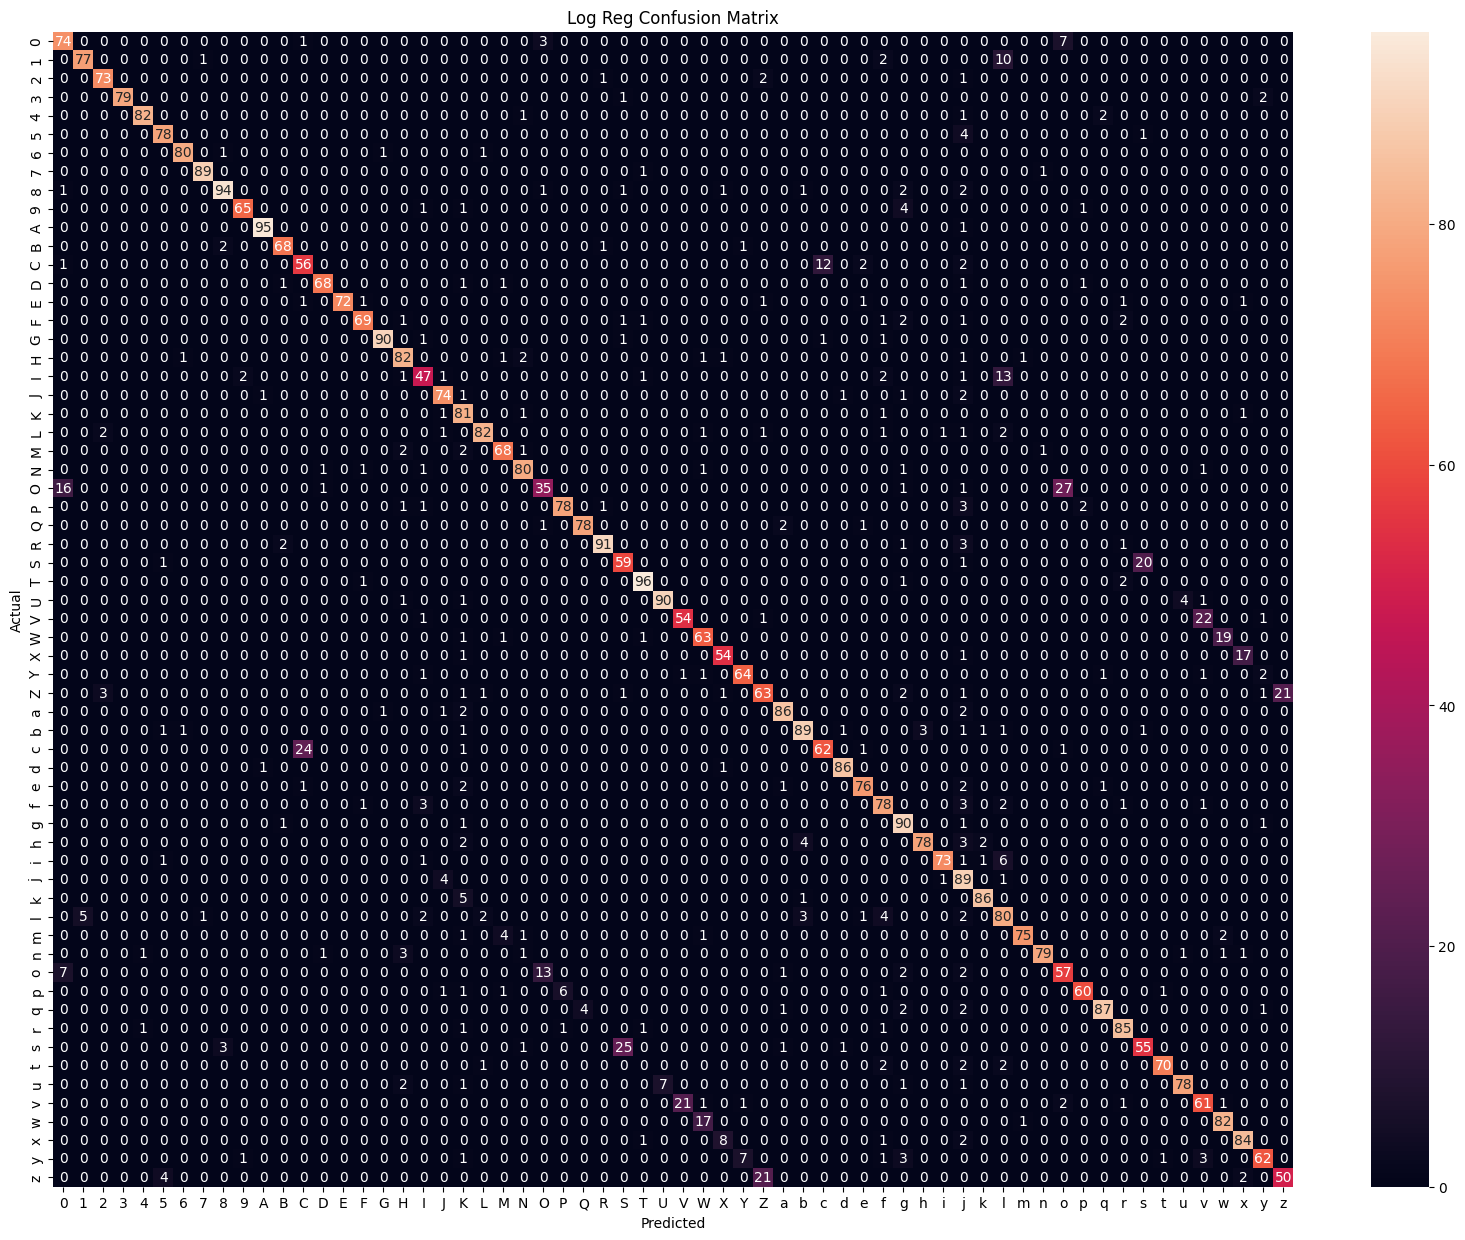

In [38]:
cm_svm_rbf = confusion_matrix(y_test, y_svm_rbf_pred)

plt.figure(figsize=(20,15))
sns.heatmap(cm_svm_rbf, annot=True, fmt='d', xticklabels=all_characters, yticklabels=all_characters)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Log Reg Confusion Matrix')
plt.show()